In [1]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 637 (delta 137), reused 184 (delta 109), pack-reused 361
Receiving objects: 100% (637/637), 10.76 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (321/321), done.


1. 데이터 수집

(1) 사용 데이터


boston housing 데이터 세트를 일부 수정한 것


(2) 데이터 로딩

csv 파일로 불러오고 해당 파일의 경우 컬럼명이 없으므로 header=None으로 인자를 설정해서 데이터 불러온 후, 리스트 col_names로 컬럼명을 따로 설정

In [47]:
import pandas as pd

data = pd.read_csv('./yemoonsaBigdata/datasets/Part2/housing_data.csv',header=None, sep=',')
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV','isHighValue']
data.columns = col_names

head 함수를 이용해서 데이터 세트의 앞 부분을 확인한 후, 데이터 형태 대략적으로 보기

MEDV 변수는 자가 주택의 중앙값을 의미하며 우리가 관심 있는 회귀 종속 변수가 됨

isHighValue 변수는 분류 모델의 종속변수로 활용하기 위해서 MEDV를 이용해서 임의로 만들어 낸 파생변수
( MEDV 값이 25이상인 경우 1, 아니면 0을 가짐)

In [3]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7            1  
3     18.7  394.63   2.94  33.4            1  
4     18.7  396.90   5.33  36.2            1  


2. 데이터 전처리

(1) 데이터 확인

shape 함수로 데이터의 행과 열 수를 알 수 있다.

In [5]:
print(data.shape)

(526, 15)


행은 526개, 열은 15개이다. MEDV,isHighValue는 각각 회귀모델과 분류모델의 종속 변수, 나머지 13개 변수는 독립변수

info 함수를 사용하여 컬럼별 데이터 타입과 null 값이 아닌 행 수를 확인 + 결측치가 존재하는 컬럼은 데이터 전처리가 필요 -> 결측치의 존재 여부 미리 확인


컬럼의 데이터 타입이 컬럼 설명과 동일하게 지정되어 있는 지 확인할 것


CRIM 에서 20개의 결측치가 있는 것을 확인

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


describe 함수를 사용하면 기본적인 요약 통계량 값을 확인할 수 있다

-> 각 변수의 분포가 치우쳐져 있는지, 값 범위는 어디에 걸쳐져 있는지, 편차가 큰지 작은 지 등의 감을 얻기

ZN 변수 ( 25,000 스퀘어 피트가 넘는 거주지 비율 )의 중앙값이 0이고,
CHAS 변수 ( 찰스 강 인접 여부, 더미 변수 )의 3분위수가 0인 것이 특징

In [8]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

(2) 결측치 처리
-> 결측치의 개수와 비율을 다시 확인

In [10]:
print(data.isnull().sum())

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64


전체 중 얼마나 차지하는 지 확인

In [11]:
print(data.isnull().sum()/data.shape[0]) # 약 3.8의 결측치 비율

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


In [63]:
# 중앙값으로 na 값 대체
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

In [64]:
# 결측치 모든 행 제거
data = data1.loc[data['CRIM'].notnull(),]
print(data1.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     0.791172   10.931559   11.306616    0.066540    0.555954    6.271076   
std      1.009296   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006300    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.080420    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.228336    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      1.454219   12.500000   18.100000    0.000000    0.624000    6.613500   
max      4.499545  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

(3) 이상치 처리

IQR을 활용해보기

<Axes: >

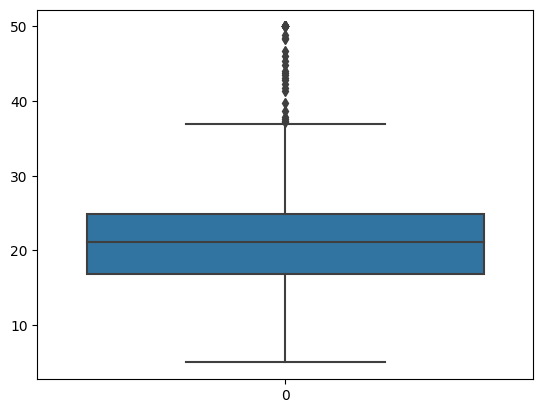

In [50]:
import seaborn as sns

sns.boxplot(data['MEDV'])

종속 변수인 MEDV로 박스 플롯을 그려봤을 때, MEDV는 20 부근에 값이 주로 산포해 있고 이상치가 존재하는 것으로 보임.

실제 IQR을 구하여 이상치 비율 확인

In [51]:
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위 : %.2f 초과 또는 %.2f 미만' % (upper_bound, lower_bound))
print('outlier 개수 : %.0f' % len(data[(data['MEDV'] > upper_bound) | (data['MEDV']<lower_bound)]))
print('outlier 비율 : %.2f' % (len(data[(data['MEDV'] > upper_bound) | (data['MEDV']<lower_bound)])/ len(data)))

# 전체 데이터 중 8%가 이상치에 해당

outlier 범위 : 37.10 초과 또는 4.70 미만
outlier 개수 : 37
outlier 비율 : 0.07


In [52]:
def get_outlier_prop(x):

  Q1, Q3 = x.quantile([0.25,0.75])
  IQR = Q3-Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  outliers = x[(x>upper_bound)|(x<lower_bound)] # |의 경우 or을 나타냄, and의 경우 and를 나타냄

  return str(round(100*len(outliers)/len(x), 1)) + '%'

print(data.apply(get_outlier_prop))
 #  apply는 DataFrame(또는 Series)의 각 열 또는 전체 Series(만약 data가 Series인 경우)에 get_outlier_prop 함수를 적용합니다.

CRIM           12.5%
ZN             12.9%
INDUS           0.0%
CHAS            6.7%
NOX             0.0%
RM              5.7%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         2.9%
B              15.2%
LSTAT           1.3%
MEDV            7.0%
isHighValue     0.0%
dtype: object


통계적으로 이상치일지라도 의미상 이상치가 아닐 수 있다.
예를 들어 CHAS 변수에서 이상치가 있는 것으로 나왔지만, 더미 변수 이므로 실제 이상치가 아니다

또한 MEDV도 마찬가지다. 일반적으로 주택 가격은 편차가 크기 때문에 만약 제거한다면 고가의 주택이 위치해 있는 지역에 대한 학습을 못하는 결과를 불러올 수 있다.

In [36]:
# EXAMPLE 1

Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


data1 = data[(data['MEDV'] <= upper_bound) & (data['MEDV']>=lower_bound)]
data1.shape

(466, 15)

In [37]:
# EXAMPLE 2

data2 = data[~(data['MEDV'] >= 45)]
data.shape

(506, 15)

(4) 변수 변환


1. 변수의 분포가 한쪽으로 크게 치우쳐져 있어 정규 분포를 따른다고 보기 힘든 경우
-> 로그 변환, 제곱근 변환, Box-Cox 등의 변수 변환을 통해 왜도를 줄일 수 있음

--------------------------------------------------------------------------------

2. 데이터 스케일링 ( 학습 데이터로만 스케일러를 적합시켜야함)
-> 각 변수별로 데이터의 범위 및 단위가 다를 경우 모델 학습이 제대로 이루어지지 않을 수 있음

<ipython-input-53-97baad9901ea>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-53-97baad9901ea>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-53-97baad9901ea>:11: UserWarning: 

`di

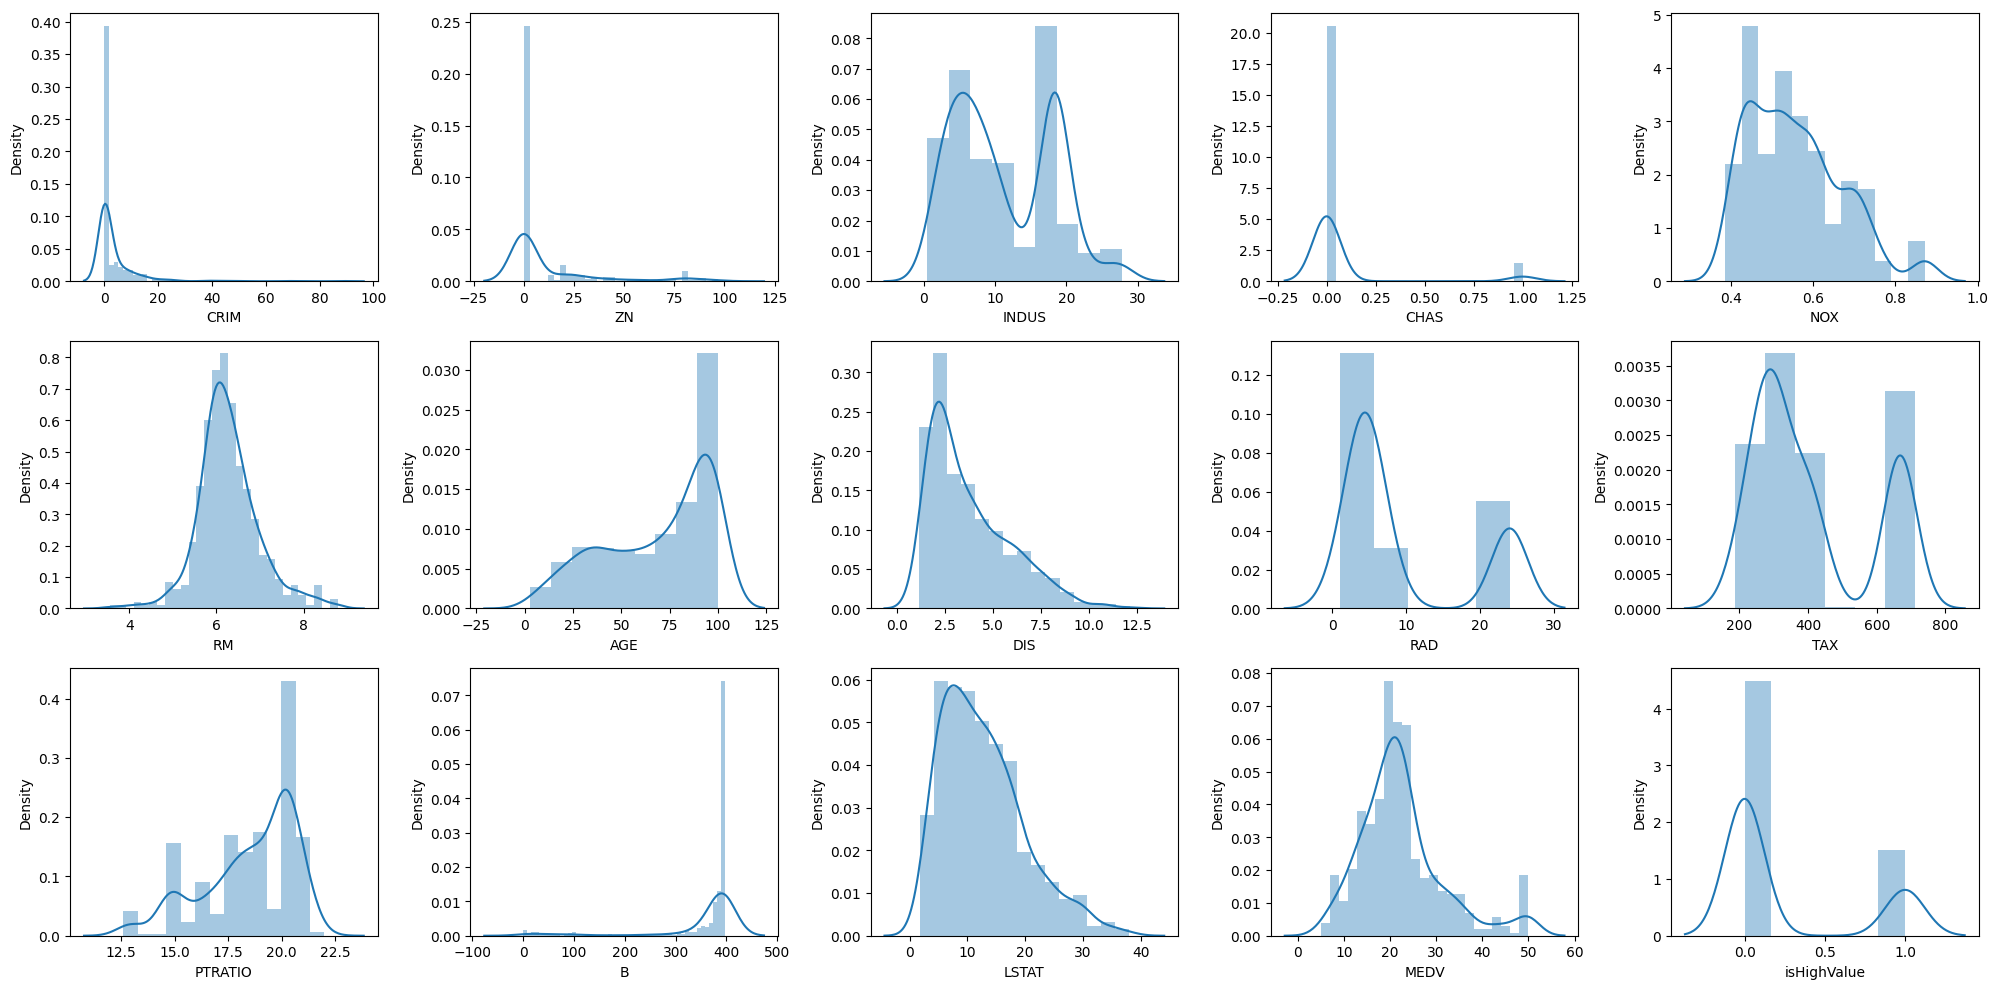

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots(ncols=5, nrows= 3, figsize=(20,10))
idx = 0
for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax = axs[_row][_col])
      idx+=1

plt.tight_layout()

# 변수 앞에 _의 경우
# 종종 반복문에서 사용되는 변수를 나타낼 때 사용되는 관례적인 변수 이름입니다.
#이러한 변수 이름은 실제로 사용되는 변수와 혼동을 피하기 위해 일반적으로 사용됩니다.

In [54]:
# 왜도의 절대값이 3 이상이면 치우쳐져 있다고 판단
print(data.apply(lambda x : x.skew(), axis=0)) # 각 열에 대해서 적용 ( axis = 0 )

CRIM           5.223149
ZN             2.290540
INDUS          0.335891
CHAS           3.488440
NOX            0.707609
RM             0.430156
AGE           -0.616643
DIS            1.065567
RAD            1.035748
TAX            0.659300
PTRATIO       -0.848553
B             -2.956237
LSTAT          0.893318
MEDV           1.126802
isHighValue    1.152146
dtype: float64


CRIM은 3 이상이므로 로그 변환하기 ( CHAS 변수는 더미 변수이므로 제외)

In [76]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

0.6467257734269894


<ipython-input-76-972de9697feb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRIM'] = np.log1p(data['CRIM'])


3. 회귀 모델링
회귀 모델에서는 종속변수로 MEDV 변수를 사용,
분류 모델의 종속변수로 사용할 isHighValue 변수는 제외하여 df_r라는 데이터프레임으로 저장한 후 데이터 탐색 진행

In [66]:
df_r = data.drop(['isHighValue'],axis=1) # 열에 적용 ( axis= 1 )

MEDV 변수와 LSTAT 변수 사이의 상관계수는 강한 음의 상관 관계를 갖고, RM 변수 사이의 상관 계수는 강한 양의 상관 관계를 갖는다.

즉 LSTAT, RM 변수는 MEDV 변수 값을 예측하는 데 중요한 변수로 쓰일 수 있다.


RAD 변수와  TAX 변수 사이의 상관계수가 아주 강한 상관관계를 가진다.
-> 다중 공선성을 갖는다 ( 이 경우 제거하는 것이 좋다 )

In [77]:
cols = ['MEDV','LSTAT','RM','CHAS','RAD','TAX']
print(df_r[cols].corr()) # 상관관계 행렬

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


데이터 분할 ( 7 : 3 = 학습 : 검증 )

독립변수 전체 사용 X, 상관관계가 높게 나온 일부 변수만 사용

In [78]:
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT','RM','TAX','AGE','NOX','INDUS','CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,y, test_size=0.3, random_state=123)

데이터 스케일링 : min-max 스케일링 사용

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.fit_transform(X_test_r)

선형회귀, svm, 랜덤포레스트 모델 만들기

시험 준비 시, 알고리즘별로 하이퍼파라미터 종류와 의미, 튜닝 방법 익히기

In [80]:
# 선형 회귀

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

모델의 coef_, intercept_ 값을 이용해 선형 회귀 모델의 계수와 절편 확인 가능

계수 값의 부호가 양이면 종속변수와 양의 관계, 부호의 음이면 음의 관계 뜻함

계수의 갑이 클수록 그 영향도가 크다.

In [81]:
print(model_lr.coef_)

[-20.25063671  30.26410478  -7.59147081   0.46003897   0.76807518
   1.72762234   4.19347944]


In [82]:
print(model_lr.intercept_)

13.705375264219157


In [83]:
# SVM

from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

In [84]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state = 123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)

In [85]:
# 모델의 feature_importances_ 값을 이용해 모델에서 사용하는 변수 중요도 확인

for x, val in zip(X_cols, model_rfr.feature_importances_):
  print(f'{x} : %3.f' %val)

LSTAT :   0
RM :   1
TAX :   0
AGE :   0
NOX :   0
INDUS :   0
CRIM :   0


(3) 분석 모형 평가

In [86]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE: %.3f' % mean_absolute_error(y_test_r, y_pred_lr))
print('MSE: %.3f' % mean_squared_error(y_test_r, y_pred_lr))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test_r, y_pred_lr))

print('-'*30)
print('SVM 결과')
print('MAE: %.3f' % mean_absolute_error(y_test_r, y_pred_svr))
print('MSE: %.3f' % mean_squared_error(y_test_r, y_pred_svr))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test_r, y_pred_svr))

print('-'*30)
print('랜덤포레스트 결과')
print('MAE: %.3f' % mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE: %.3f' % mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test_r, y_pred_rfr))

------------------------------
선형 회귀 결과
MAE: 4.412
MSE: 40.117
MAPE: 0.232
------------------------------
SVM 결과
MAE: 3.624
MSE: 34.734
MAPE: 0.160
------------------------------
랜덤포레스트 결과
MAE: 2.794
MSE: 21.798
MAPE: 0.137


4. 분류 모델링

(1) 데이터 탐색

In [88]:
# 종속변수로 isHighValue 변수 사용 -> MEDV ( 회귀모델 종속변수)는 제외

df_c = data.drop(['MEDV'], axis=1)

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

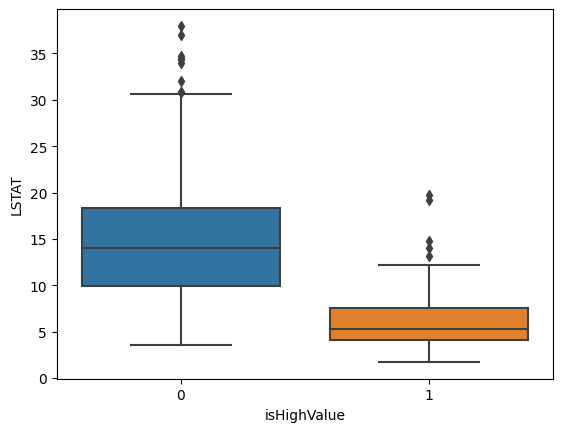

In [89]:
import seaborn as sns

sns.boxplot(x='isHighValue', y= 'LSTAT', data=df_c)

# 0인지 1인지에 따라 LSTAT 변수의 값 분포가 크게 차이 남

<Axes: xlabel='LSTAT', ylabel='Density'>

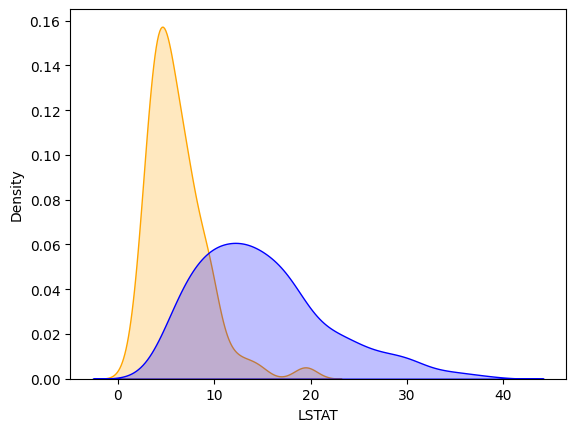

In [90]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue']==1, 'LSTAT'],color='orange',fill=True)
sns.kdeplot(df_c.loc[df_c['isHighValue']==0, 'LSTAT'],color='blue',fill=True)

시험 중에는 시각화 방법 사용을 못함.

덜 효과적이지만 isHighValue 값에 따른 각 독립변수의 평균값을 구해서 유효한 독립변수 탐색

In [91]:
import numpy as np

print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue           0           1
CRIM           0.383707    0.191553
ZN             6.691176   24.602273
INDUS         12.777353    6.488485
CHAS           0.050802    0.121212
NOX            0.575957    0.494454
RM             6.028837    7.009394
AGE           73.275134   55.257576
DIS            3.593655    4.365642
RAD           10.729947    6.204545
TAX          440.788770  316.007576
PTRATIO       18.994920   16.927273
B            346.706738  384.914697
LSTAT         14.949652    6.146061
isHighValue    0.000000    1.000000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(2) 분석 모형 구축

분류 모델을 만들 때도 회귀 모델을 만들 때와 같은 방법으로 데이터 분할 및 데이터 스케일링을 진행한다.

In [93]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT','PTRATIO','TAX','AGE','NOX','INDUS','CRIM']

X = data[X_cols].values
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state = 123)

In [94]:
# 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

In [97]:
# 모델 구축
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled,y_train_c)

LogisticRegression()

In [98]:
print(model_lo.coef_)

[[-4.67409989 -2.25182847 -0.94528889  0.37753137 -0.49993014 -1.49658126
   1.08823619]]


In [100]:
print(model_lo.intercept_)

[1.9191835]


In [101]:
# SVM

from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

In [102]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

In [104]:
for x, val in zip(X_cols,model_rfc.feature_importances_):
  print(f'{x} : %.3f' % val)

LSTAT : 0.378
PTRATIO : 0.105
TAX : 0.112
AGE : 0.087
NOX : 0.080
INDUS : 0.134
CRIM : 0.104


In [105]:
# 분석 모형 평가
## 평가용 데이터로 예측값을 구하기, predict 함수 사용 시 threshold가 0.5인 상태로 예측값을 구함
## 0.5 이상이면 1, 아니면 0 값을 결과로 얻음 ( 모델이 계산한 예측 확률)

y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

In [108]:
from sklearn.metrics import classification_report


print('-'*60)
print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels = [0,1]))

print('-'*60)
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels = [0,1]))

print('-'*60)
print('랜덤포레스트 결과')
print(classification_report(y_test_c, y_pred_rfc, labels = [0,1]))

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       115
           1       0.88      0.62      0.73        37

    accuracy                           0.89       152
   macro avg       0.89      0.80      0.83       152
weighted avg       0.89      0.89      0.88       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       115
           1       0.87      0.73      0.79        37

    accuracy                           0.91       152
   macro avg       0.89      0.85      0.87       152
weighted avg       0.91      0.91      0.91       152

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.86   

In [110]:
# AUROC 값 구하여 성능 비교

from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:,1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:,1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:,1]

print('로지스틱 회귀 결과: %.3f' %roc_auc_score(y_test_c,y_pred_lo))
print('SVM 결과: %.3f' %roc_auc_score(y_test_c,y_pred_svc))
print('랜덤포레스트 결과: %.3f' %roc_auc_score(y_test_c,y_pred_rfc))

로지스틱 회귀 결과: 0.920
SVM 결과: 0.937
랜덤포레스트 결과: 0.966
